<a href="https://colab.research.google.com/github/felipemotarh/felipemotarh/blob/main/Exerc%C3%ADcio_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1: Importação das Bibliotecas e
Carregar a base de dados no Google Colab

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots



In [8]:
df = pd.read_excel('/content/Base_Vendas.xlsx')
display(df.head())


,Data da Venda,Nome da Loja,UF da Compra,Nome do Produto,Categoria do Produto,Marca do Produto,Quantidade,Valor da Venda
0,2023-05-06,Supermercado Mundial,SP,Leite,Laticinios,Piracanjuba,19,44.98
1,2022-09-04,Supermercado Bom Valor,SP,Carne Bovina,Carnes,Montana,18,60.91
2,2022-12-09,Mercadinho do Lar,MG,Banana,Frutas,Frutas Mais Sabor,9,37.84
3,2023-05-15,Supermercado Mundial,MG,Leite,Laticinios,Vigor,9,44.25
4,2023-06-25,Supermercado Bom Valor,SP,Queijo,Laticinios,Vigor,8,28.17


2.Adicionar nova coluna


In [9]:
df['Total'] = df['Quantidade'] * df['Valor da Venda']
df.head()


,Data da Venda,Nome da Loja,UF da Compra,Nome do Produto,Categoria do Produto,Marca do Produto,Quantidade,Valor da Venda,Total
0,2023-05-06,Supermercado Mundial,SP,Leite,Laticinios,Piracanjuba,19,44.98,854.62
1,2022-09-04,Supermercado Bom Valor,SP,Carne Bovina,Carnes,Montana,18,60.91,1096.38
2,2022-12-09,Mercadinho do Lar,MG,Banana,Frutas,Frutas Mais Sabor,9,37.84,340.56
3,2023-05-15,Supermercado Mundial,MG,Leite,Laticinios,Vigor,9,44.25,398.25
4,2023-06-25,Supermercado Bom Valor,SP,Queijo,Laticinios,Vigor,8,28.17,225.36


3. Total das Vendas


In [10]:
total_vendas = df['Total'].sum()
print(f'O total das vendas é de R$: {total_vendas:.2f}')

O total das vendas é de R$: 15168432.25


4. Adicionando colunas dia, mês e Ano

In [11]:
df['Data da Venda'] = pd.to_datetime(df['Data da Venda'])
df['Dia'] = df['Data da Venda'].dt.day
df['Mês'] = df['Data da Venda'].dt.month
df['Ano'] = df['Data da Venda'].dt.year
df.head()


,Data da Venda,Nome da Loja,UF da Compra,Nome do Produto,Categoria do Produto,Marca do Produto,Quantidade,Valor da Venda,Total,Dia,Mês,Ano
0,2023-05-06,Supermercado Mundial,SP,Leite,Laticinios,Piracanjuba,19,44.98,854.62,6,5,2023
1,2022-09-04,Supermercado Bom Valor,SP,Carne Bovina,Carnes,Montana,18,60.91,1096.38,4,9,2022
2,2022-12-09,Mercadinho do Lar,MG,Banana,Frutas,Frutas Mais Sabor,9,37.84,340.56,9,12,2022
3,2023-05-15,Supermercado Mundial,MG,Leite,Laticinios,Vigor,9,44.25,398.25,15,5,2023
4,2023-06-25,Supermercado Bom Valor,SP,Queijo,Laticinios,Vigor,8,28.17,225.36,25,6,2023


5. Venda por Categoria de Produto

In [12]:
vendas_por_categoria = df.groupby('Categoria do Produto')['Total'].sum(). sort_values(ascending=False)
print(vendas_por_categoria)

Categoria do Produto
Laticinios    4615397.93
Frutas        4198677.90
Vegetais      4071946.20
Carnes        2282410.22
Name: Total, dtype: float64


6. Vendas por Lojas

In [13]:
vendas_por_loja = df.groupby('Nome da Loja')['Total'].sum().sort_values(ascending=False)
print(vendas_por_loja)

Nome da Loja
Supermercado Mundial           806430.46
Hipermercado Economia Certa    788810.06
Mini Mercado do Rafael         786529.71
Quitanda da Esquina            785210.06
Lojinha do Bairro              778391.99
Mercadinho do Lar              774559.42
Supermarket Plus               772297.13
Mercadinho Central             767926.24
Mercadinho do Povo             764770.02
Mercado Total                  757896.54
Supermercado Popular           757492.93
Supermercado Bom Valor         757005.80
Supermercado Tudo de Bom       752000.79
Hiper Center                   748001.08
Mercado Fresquinho             745139.52
Supermercado da Marginal       737796.81
Mercado da Massa               735773.23
Mercado Central                729929.12
Supermercado Varejo            718377.52
Atacado da Dutra               704093.82
Name: Total, dtype: float64


7. Vendas por Estado

In [14]:
vendas_por_estado = df.groupby('UF da Compra')['Total'].sum().sort_values(ascending=False)
print(vendas_por_estado)

UF da Compra
SP    7506844.54
MG    3587958.21
RJ    2040632.04
RS    2032997.46
Name: Total, dtype: float64


8. total vendido ao longo do tempo


In [15]:
vendas_temporal = df.groupby(['Ano', 'Mês'])['Total'].sum().unstack()
display(vendas_temporal)

Mês,1,2,3,4,5,6,7,8,9,10,11,12
Ano,,,,,,,,,,,,
2022,677297.35,601831.48,640021.09,615025.02,632430.02,614534.66,629369.62,588127.55,643703.71,662101.05,578583.21,649907.52
2023,671835.29,575543.60,635419.22,600026.87,632692.27,617458.33,665212.82,655076.53,659423.06,674058.25,611300.08,637453.65


9. Visualização dos Dados



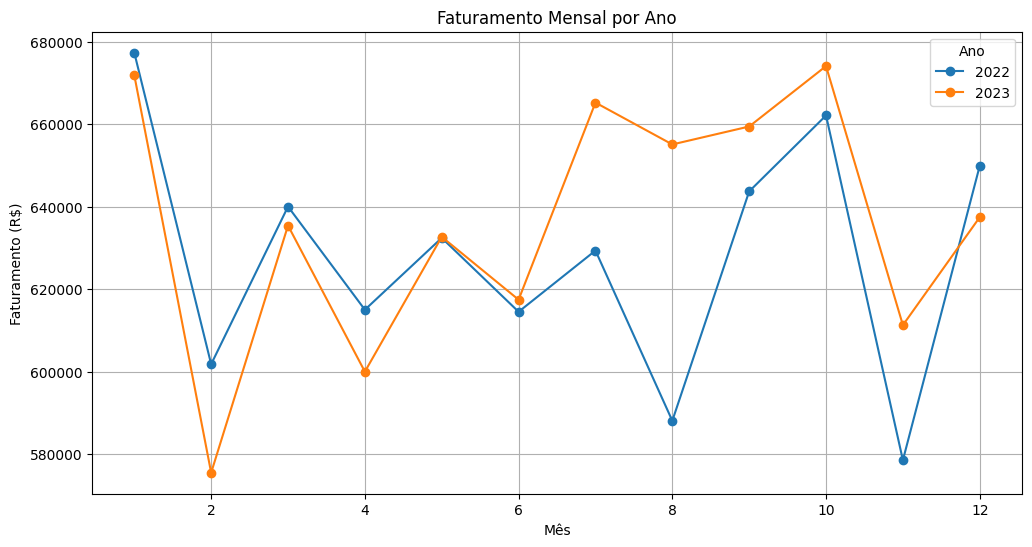

In [16]:
vendas_temporal.T.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Faturamento Mensal por Ano')
plt.xlabel('Mês')
plt.ylabel('Faturamento (R$)')
plt.legend(title='Ano')
plt.grid()
plt.show()

In [17]:
grafico = px.bar(vendas_por_estado,  x = vendas_por_estado.index, y = 'Total')
grafico.show()

In [18]:
grafico = px.bar (vendas_por_loja, x = vendas_por_loja.index, y = 'Total')
grafico.show()

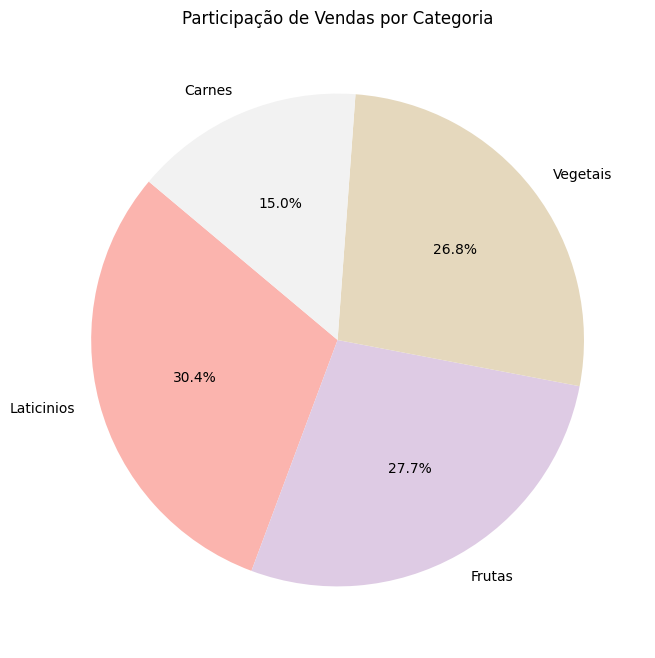

In [19]:
#Pariticipação de Vendas por Categoria
plt.figure(figsize=(8, 8))
vendas_por_categoria.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Pastel1')
plt.title('Participação de Vendas por Categoria')
plt.ylabel('')  # Remover o rótulo do eixo y
plt.show()

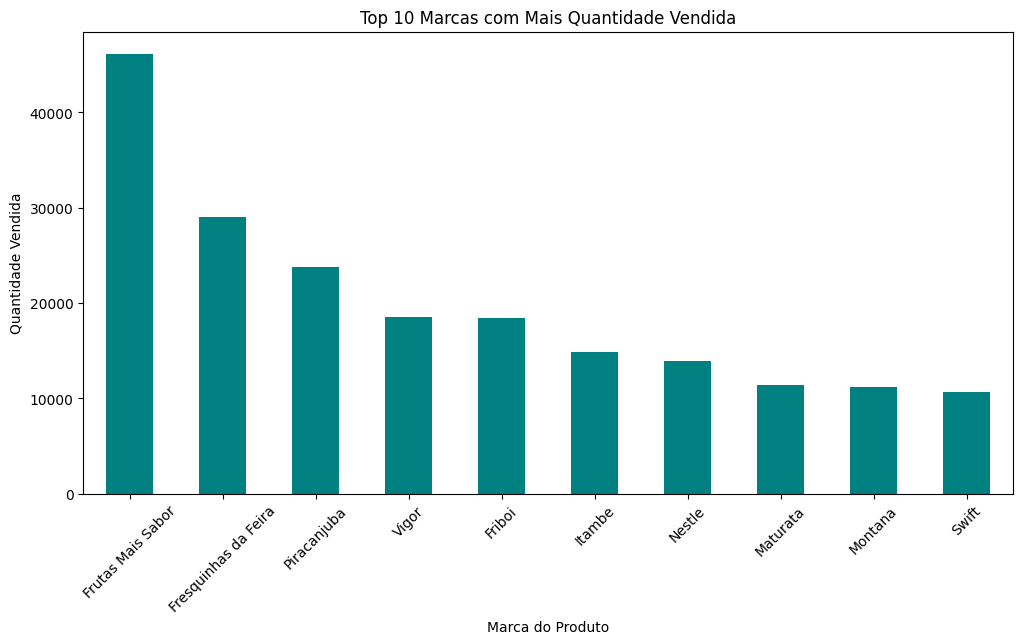

In [20]:
quantidade_por_marca = df.groupby('Marca do Produto')['Quantidade'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
quantidade_por_marca.plot(kind='bar', color='teal')
plt.title('Top 10 Marcas com Mais Quantidade Vendida')
plt.ylabel('Quantidade Vendida')
plt.xlabel('Marca do Produto')
plt.xticks(rotation=45)
plt.show()

10 - Entender a raiz e levantar hipóteses

Identificamos que nos meses de fevereiro e Novembro houve uma significativa queda nas vendas. Possíveis hipóteses

1.   Sazonalidade e períodos de baixa demanda
2.   Feriados e Eventos - Fevereiro geralmente inclui o carnaval no Brasil, o que pode afetar o padrão de consumo dependendo da localização das lojas. Novembro pode ser um mês de transição entre eventos promocionais  (como a black friday) e o período de compras natalina
3. Logística e Estoque: problema na cadeia de suprimentos ou falta de estoque de produtos
4. Desempenho por região: fatores regionais como clima (ex: chuvas intensas) ou economia local, podem influenciar vendas em determinados estados.
5. Promoções e estratégia de marketing: ausência de promoções ou campanhas de marketing nesses meses podem ter impactado o volume de vendas.








